<a href="https://colab.research.google.com/github/marvelxcodes/My-ML-Documentary/blob/main/ClothingNamewithComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Initial Setup**

##**1.1 Installing tensorflow_datasets**

In [ ]:
!pip install -U tensorflow_datasets

##**1.2 Importing Required Modules**

In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow_datasets as tfds

import tensorflow as tf
from tensorflow import keras
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(f"Current TensorFlow Version: {tf.__version__}")


Current TensorFlow Version: 2.11.0


##**2.1 Fetching and Spliting Dataset**

In [ ]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##**2.2 Having a look at the Dataset**

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"Number of training examples = {num_train_examples}")
print(f"Number of testing examples = {num_test_examples}")

Number of training examples = 60000
Number of testing examples = 10000


##**3.1 Preprocessing the data**

In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [7]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

##**3.2 Exploring the processed data**

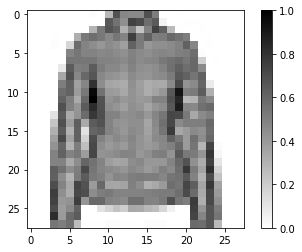

In [14]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# **2. Building the Model**

##**2.1 Setting up the layers**

In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## **2.2 Compiling our model**

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)